In [3]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Import train & test data 
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
gender_submission = pd.read_csv('./data/gender_submission.csv') # example of what a submission should look like

In [6]:
# View the training data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
len(train)

891

In [7]:
# View the test data (same columns as the training data)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# View the example submisison dataframe
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Getting missing values

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


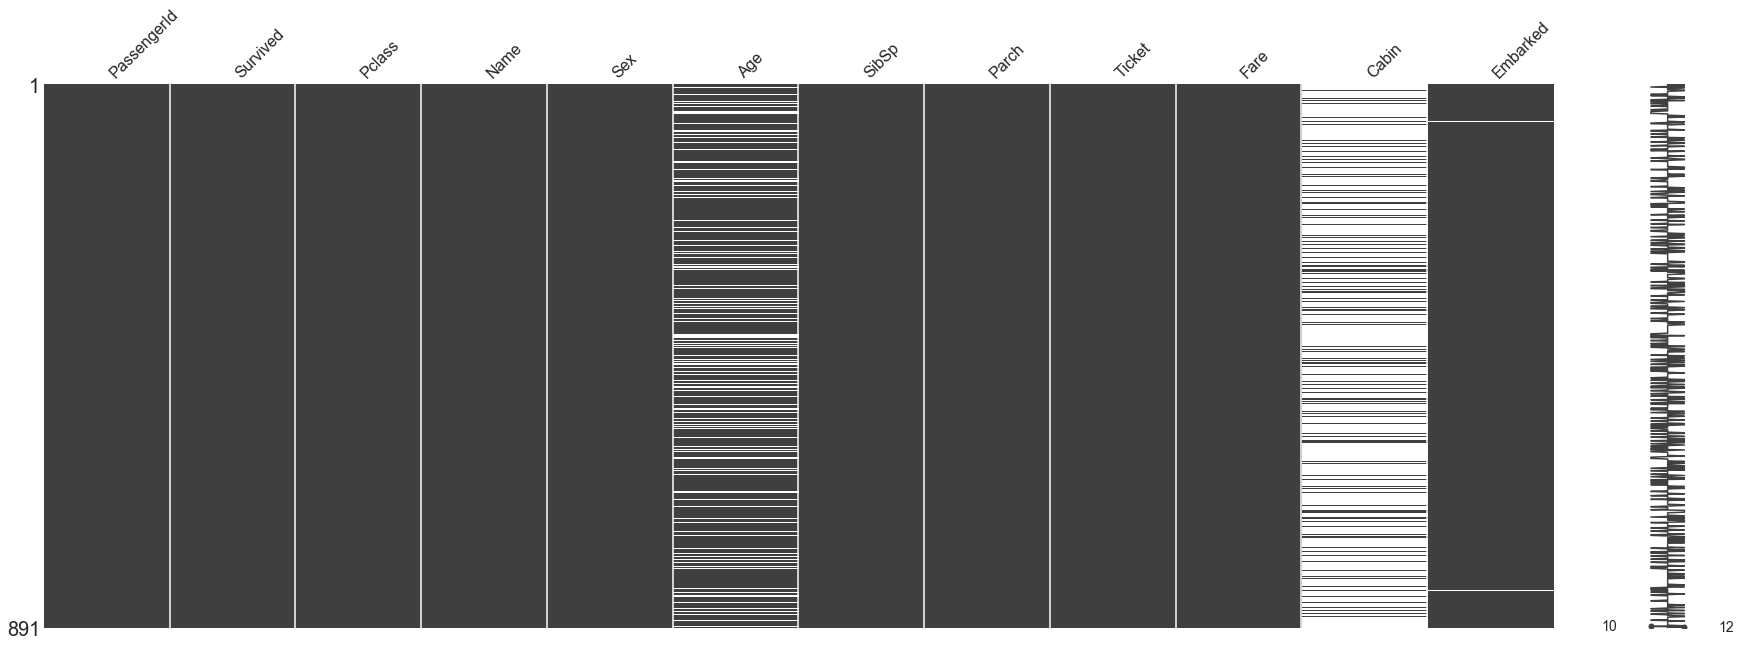

In [11]:
missingno.matrix(train, figsize=(30, 10))

## Get missing values

In [15]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [25]:
train['Age'].value_counts().sum()

714

In [17]:
def find_missing_values(df, columns):
    missing_values = {}
    df_length = len(df)
    
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_values[column] = df_length - total_column_values
    return missing_values 

In [39]:
missing_values = find_missing_values(train, train.columns)

In [40]:
missing_values

{'PassengerId': 0,
 'Survived': 0,
 'Pclass': 0,
 'Name': 0,
 'Sex': 0,
 'Age': 177,
 'SibSp': 0,
 'Parch': 0,
 'Ticket': 0,
 'Fare': 0,
 'Cabin': 687,
 'Embarked': 2}

## Analyze the data

In [26]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

In [28]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature: Survived

0    549
1    342
Name: Survived, dtype: int64


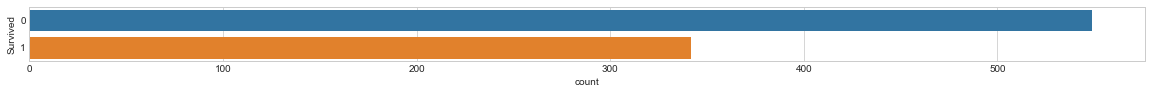

In [33]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y="Survived", data=train)
print(train.Survived.value_counts())

In [34]:
df_bin['Survived'] = train["Survived"]
df_con['Survived'] = train["Survived"]

In [35]:
df_bin.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [36]:
df_con.head()

,Survived
0,0
1,1
2,1
3,1
4,0


## Feature: Pclass
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

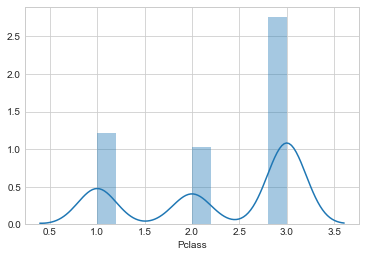

In [38]:
sns.distplot(train["Pclass"])

In [41]:
missing_values["Pclass"]

0

In [42]:
df_bin["Pclass"] = train["Pclass"]
df_con["Pclass"] = train["Pclass"]

In [43]:
df_bin.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [44]:
df_con.head()

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


## Feature : name

In [46]:
train.Name.value_counts().sum()

891

## Feature: sex

male      577
female    314
Name: Sex, dtype: int64


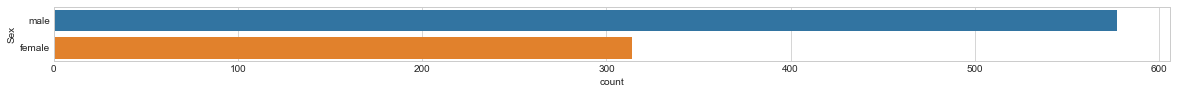

In [49]:
plt.figure(figsize=(20, 1))
sns.countplot(y="Sex", data=train)
print(train.Sex.value_counts())

In [50]:
missing_values["Sex"]

0

In [52]:
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0)

df_con['Sex'] = train['Sex']

In [53]:
df_bin.head()

,Survived,Pclass,Sex
0,0,3,0
1,1,1,1
2,1,3,1
3,1,1,1
4,0,3,0


In [54]:
df_con.head()

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


### Comparing sex values with survived

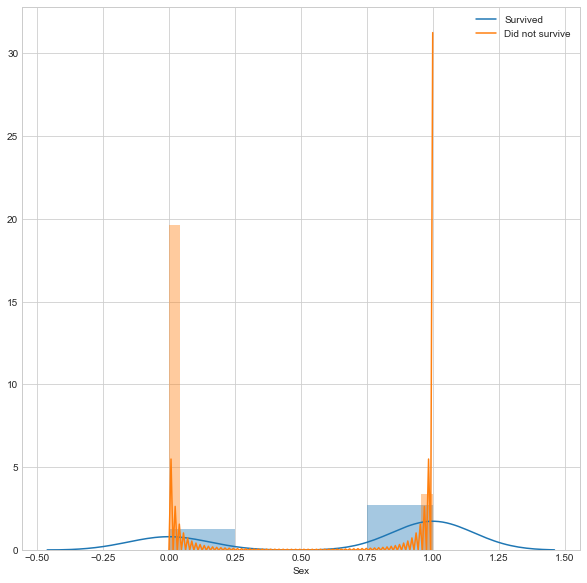

In [63]:
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'})
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'})

### Function to create and count distribution visualization

In [107]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"}, color='#388E3C', kde=False);
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"}, color='#FA3937', kde=False);
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"}, color='#388E3C', kde=False);
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"}, color='#FA3937', kde=False);

## Feature: SibSp

In [64]:
missing_values["SibSp"]

0

In [65]:
column = "SibSp"

In [66]:
train[column].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [68]:
df_bin[column] = train[column]
df_con[column] = train[column]

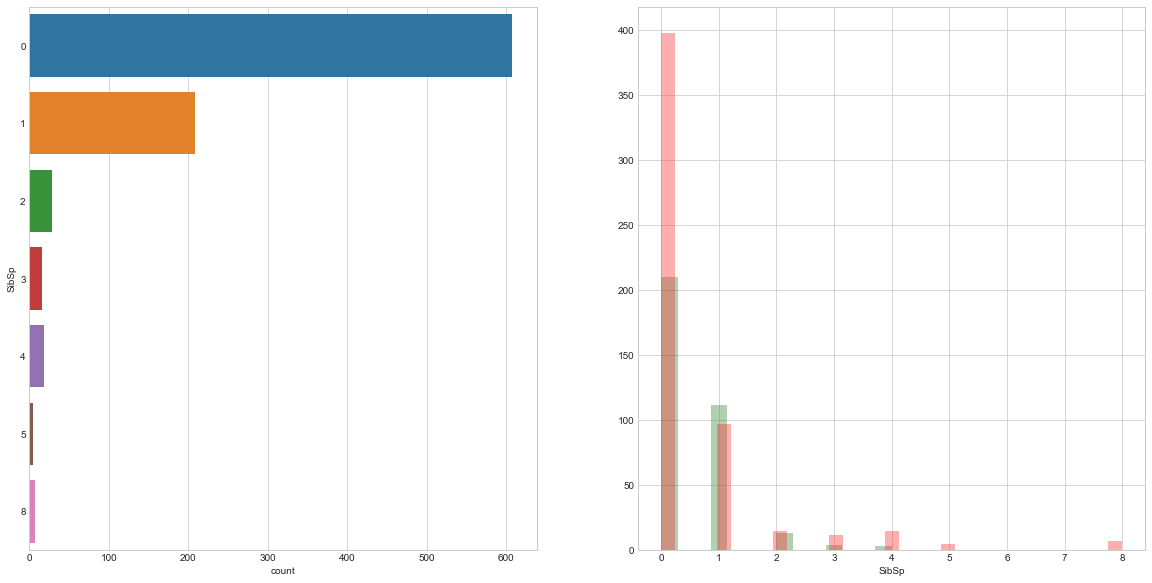

In [86]:
plot_count_dist(train, df_bin, label_column="Survived", target_column=column, figsize=(20,10))

## Feature: Parch

In [87]:
column = "Parch"

In [88]:
missing_values[column]

0

In [89]:
train[column].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [90]:
df_bin[column] = train[column]
df_con[column] = train[column]

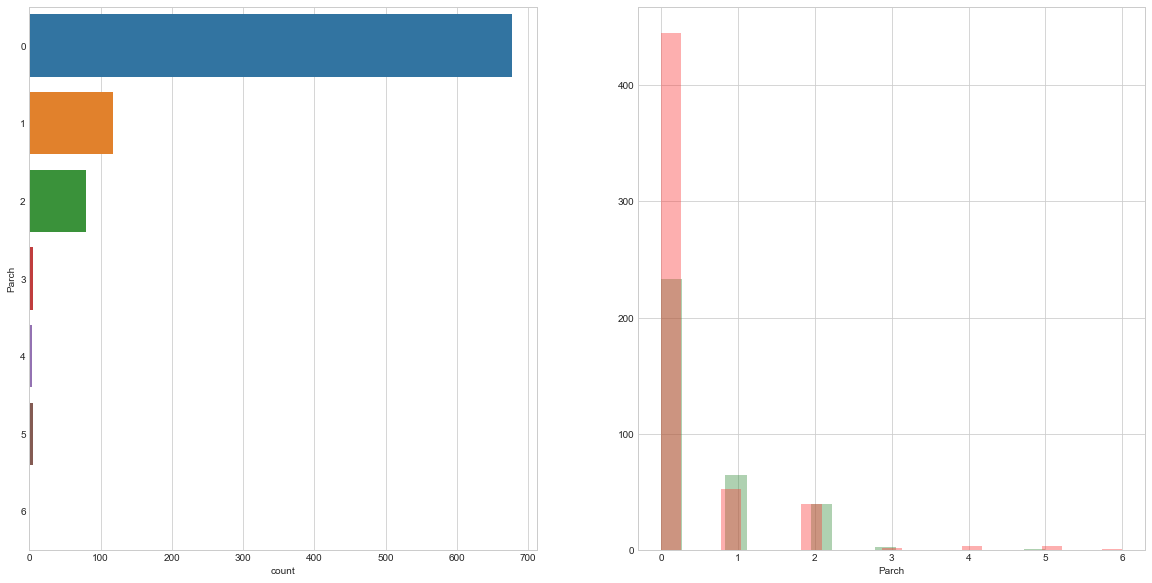

In [91]:
plot_count_dist(train, df_bin, label_column="Survived", target_column=column, figsize=(20,10))

In [92]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,male,1,0
1,1,1,female,1,0
2,1,3,female,0,0
3,1,1,female,1,0
4,0,3,male,0,0


In [93]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch
0,0,3,0,1,0
1,1,1,1,1,0
2,1,3,1,0,0
3,1,1,1,1,0
4,0,3,0,0,0


## Feature: Ticket

In [94]:
column = "Ticket"

In [95]:
missing_values[column]

0

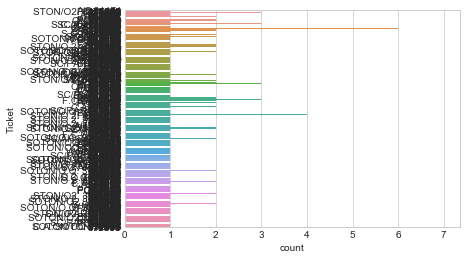

In [97]:
sns.countplot(y="Ticket", data=train)

In [98]:
train[column].value_counts()

CA. 2343             7
1601                 7
347082               7
CA 2144              6
3101295              6
347088               6
S.O.C. 14879         5
382652               5
PC 17757             4
17421                4
W./C. 6608           4
349909               4
113781               4
2666                 4
113760               4
LINE                 4
4133                 4
347077               4
19950                4
230080               3
PC 17582             3
345773               3
248727               3
110413               3
C.A. 34651           3
SC/Paris 2123        3
371110               3
239853               3
29106                3
363291               3
                    ..
SC/PARIS 2133        1
SC/PARIS 2131        1
237671               1
349252               1
PC 17318             1
11769                1
315037               1
113804               1
28425                1
SC/AH 3085           1
349210               1
2664                 1
SOTON/O.Q. 

## Feature: Fare

In [99]:
column = "Fare"

In [100]:
missing_values[column]

0

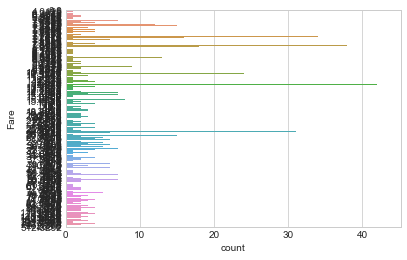

In [101]:
sns.countplot(y=column, data=train)

In [102]:
df_con[column] = train[column]
df_bin[column] = pd.cut(train[column], bins=5)

In [103]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [104]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare
0,0,3,0,1,0,"(-0.512, 102.466]"
1,1,1,1,1,0,"(-0.512, 102.466]"
2,1,3,1,0,0,"(-0.512, 102.466]"
3,1,1,1,1,0,"(-0.512, 102.466]"
4,0,3,0,0,0,"(-0.512, 102.466]"


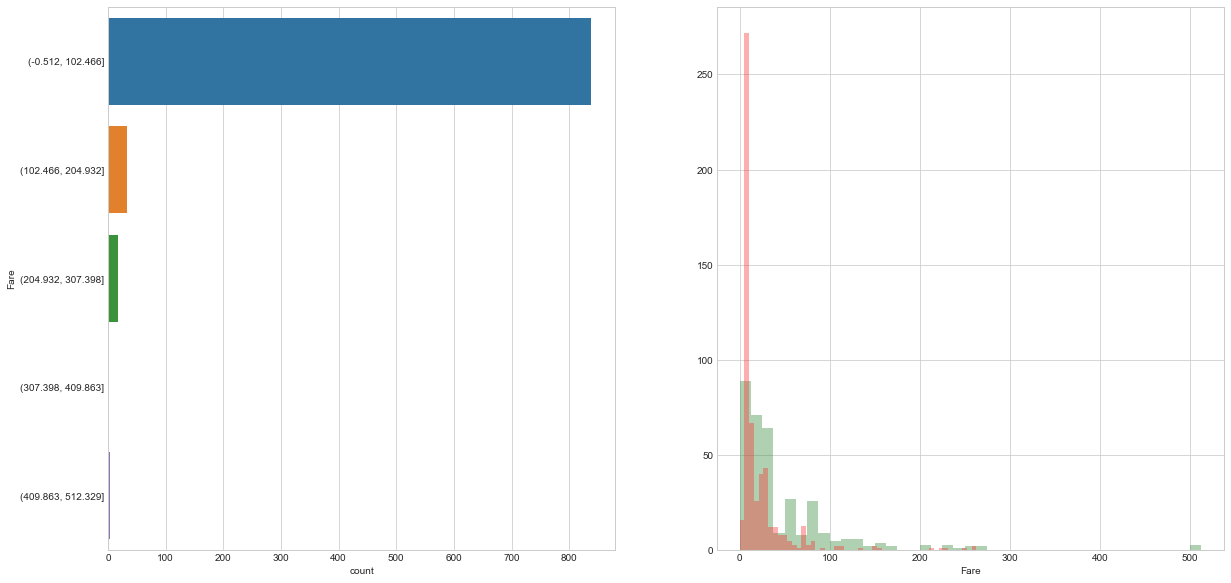

In [108]:
plot_count_dist(train, df_bin, label_column="Survived", target_column=column, figsize=(20,10), use_bin_df=True)

## Feature: Cabin

In [109]:
column = "Cabin"

In [110]:
missing_values[column]

687

## Feature: Embarked

In [111]:
column = "Embarked"

In [112]:
missing_values[column]

2

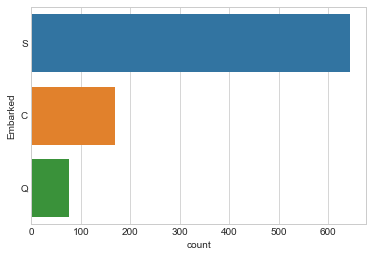

In [113]:
sns.countplot(y=column, data=train)

In [114]:
df_bin[column] = train[column]
df_con[column] = train[column]

dropping the missing values

In [115]:
df_con = df_con.dropna(subset=[column])
df_bin = df_bin.dropna(subset=[column])

In [116]:
len(df_bin)

889

# Feature Encoding

We will encode our binned dataframe (df_bin) with one-hot encoding and our continuous dataframe (df_con) with the label encoding function from sklearn.

In [117]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,"(-0.512, 102.466]",S
1,1,1,1,1,0,"(-0.512, 102.466]",C
2,1,3,1,0,0,"(-0.512, 102.466]",S
3,1,1,1,1,0,"(-0.512, 102.466]",S
4,0,3,0,0,0,"(-0.512, 102.466]",S


In [121]:
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(data=df_bin, columns=one_hot_cols)
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Parch_5,Parch_6,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_C,Embarked_Q,Embarked_S
0,0,0,0,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,1,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [122]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [123]:
df_con_enc = df_con.apply(LabelEncoder().fit_transform)
df_con_enc.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,2,1,1,0,18,2
1,1,0,0,1,0,207,0
2,1,2,0,0,0,41,2
3,1,0,0,1,0,189,2
4,0,2,1,0,0,43,2


# Machine Learning Models

In [124]:
selected_df = df_con_enc

In [125]:
X_train = selected_df.drop("Survived", axis=1)
Y_train = selected_df.Survived

In [126]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [127]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# Define a function to fit machine learning algorithms

In [135]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    start_time = time.time()
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    log_time = (time.time() - start_time)
    exec_time = datetime.timedelta(seconds=log_time)
    
    return train_pred, acc, acc_cv, exec_time

## Logistic Regression

In [136]:
# Logistic Regression
train_pred_log, acc_log, acc_cv_log, exec_time = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % exec_time)

Accuracy: 79.08
Accuracy CV 10-Fold: 78.52
Running Time: 0:00:00.803347


## K-Nearest Neighbours

In [154]:
# k-Nearest Neighbours
train_pred_knn, acc_knn, acc_cv_knn, exec_time = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % exec_time)

Accuracy: 81.44
Accuracy CV 10-Fold: 73.68
Running Time: 0:00:00.821980


## Gaussian Naive Bayes

In [155]:
# Gaussian Naive Bayes
train_pred_gaussian, acc_gaussian, acc_cv_gaussian, exec_time = fit_ml_algo(GaussianNB(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % exec_time)

Accuracy: 76.72
Accuracy CV 10-Fold: 76.38
Running Time: 0:00:00.786726


## Linear Support Vector Machines (SVC)

In [156]:
# Linear SVC
train_pred_svc, acc_linear_svc, acc_cv_linear_svc, exec_time = fit_ml_algo(LinearSVC(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % exec_time)

Accuracy: 58.72
Accuracy CV 10-Fold: 67.38
Running Time: 0:00:00.836476


## Stochastic Gradient Descent

In [157]:
# Stochastic Gradient Descent
train_pred_sgd, acc_sgd, acc_cv_sgd, exec_time = fit_ml_algo(SGDClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % exec_time)

Accuracy: 44.43
Accuracy CV 10-Fold: 61.64
Running Time: 0:00:00.804002


## Decision Tree Classifier

In [158]:
train_pred_dt, acc_dt, acc_cv_dt, exec_time = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % exec_time)

Accuracy: 92.46
Accuracy CV 10-Fold: 79.64
Running Time: 0:00:00.807538


## Gradient Boost Trees

In [159]:
train_pred_gbt, acc_gbt, acc_cv_gbt, exec_time = fit_ml_algo(GradientBoostingClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % exec_time)

Accuracy: 86.39
Accuracy CV 10-Fold: 81.1
Running Time: 0:00:00.997963


# CatBoost Algorithm 

In [143]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [144]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [145]:
cat_features = np.where(X_train.dtypes != np.float)[0]
cat_features

array([0, 1, 2, 3, 4, 5])

In [147]:
train_pool = Pool(X_train, Y_train, cat_features)

In [149]:
# CatBoost model definition
catboost_model = CatBoostClassifier(iterations=1000,
                                    custom_loss=['Accuracy'],
                                    loss_function='Logloss')

# Fit CatBoost model
catboost_model.fit(train_pool,
                   plot=True)

# CatBoost accuracy
acc_catboost = round(catboost_model.score(X_train, Y_train) * 100, 2)


Learning rate set to 0.016206


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6838699	total: 33.1ms	remaining: 33.1s
1:	learn: 0.6753070	total: 59.6ms	remaining: 29.8s
2:	learn: 0.6664907	total: 82.5ms	remaining: 27.4s
3:	learn: 0.6580711	total: 105ms	remaining: 26.1s
4:	learn: 0.6509880	total: 123ms	remaining: 24.4s
5:	learn: 0.6430105	total: 145ms	remaining: 24s
6:	learn: 0.6363867	total: 164ms	remaining: 23.3s
7:	learn: 0.6298197	total: 184ms	remaining: 22.9s
8:	learn: 0.6229042	total: 207ms	remaining: 22.8s
9:	learn: 0.6164721	total: 230ms	remaining: 22.8s
10:	learn: 0.6090541	total: 252ms	remaining: 22.7s
11:	learn: 0.6031504	total: 274ms	remaining: 22.5s
12:	learn: 0.5977758	total: 294ms	remaining: 22.3s
13:	learn: 0.5920107	total: 315ms	remaining: 22.2s
14:	learn: 0.5865860	total: 338ms	remaining: 22.2s
15:	learn: 0.5815069	total: 360ms	remaining: 22.2s
16:	learn: 0.5766008	total: 378ms	remaining: 21.8s
17:	learn: 0.5734912	total: 395ms	remaining: 21.5s
18:	learn: 0.5683202	total: 413ms	remaining: 21.3s
19:	learn: 0.5638584	total: 436ms	remain

165:	learn: 0.4211909	total: 2.9s	remaining: 14.6s
166:	learn: 0.4211312	total: 2.92s	remaining: 14.6s
167:	learn: 0.4210753	total: 2.93s	remaining: 14.5s
168:	learn: 0.4209684	total: 2.94s	remaining: 14.4s
169:	learn: 0.4208641	total: 2.95s	remaining: 14.4s
170:	learn: 0.4205448	total: 2.97s	remaining: 14.4s
171:	learn: 0.4204534	total: 2.98s	remaining: 14.3s
172:	learn: 0.4203235	total: 3s	remaining: 14.3s
173:	learn: 0.4202465	total: 3.01s	remaining: 14.3s
174:	learn: 0.4198671	total: 3.03s	remaining: 14.3s
175:	learn: 0.4197881	total: 3.04s	remaining: 14.2s
176:	learn: 0.4197223	total: 3.04s	remaining: 14.2s
177:	learn: 0.4196545	total: 3.05s	remaining: 14.1s
178:	learn: 0.4195773	total: 3.06s	remaining: 14.1s
179:	learn: 0.4192400	total: 3.07s	remaining: 14s
180:	learn: 0.4190503	total: 3.08s	remaining: 14s
181:	learn: 0.4187767	total: 3.1s	remaining: 13.9s
182:	learn: 0.4185464	total: 3.11s	remaining: 13.9s
183:	learn: 0.4182871	total: 3.13s	remaining: 13.9s
184:	learn: 0.4180668

326:	learn: 0.4010597	total: 5.19s	remaining: 10.7s
327:	learn: 0.4010122	total: 5.21s	remaining: 10.7s
328:	learn: 0.4010122	total: 5.22s	remaining: 10.6s
329:	learn: 0.4008021	total: 5.23s	remaining: 10.6s
330:	learn: 0.4007748	total: 5.24s	remaining: 10.6s
331:	learn: 0.4006011	total: 5.25s	remaining: 10.6s
332:	learn: 0.4005364	total: 5.27s	remaining: 10.6s
333:	learn: 0.4003926	total: 5.28s	remaining: 10.5s
334:	learn: 0.4003832	total: 5.29s	remaining: 10.5s
335:	learn: 0.4003584	total: 5.3s	remaining: 10.5s
336:	learn: 0.4002643	total: 5.31s	remaining: 10.4s
337:	learn: 0.4002634	total: 5.32s	remaining: 10.4s
338:	learn: 0.4002484	total: 5.32s	remaining: 10.4s
339:	learn: 0.4002476	total: 5.33s	remaining: 10.3s
340:	learn: 0.4002395	total: 5.34s	remaining: 10.3s
341:	learn: 0.4001220	total: 5.35s	remaining: 10.3s
342:	learn: 0.3998889	total: 5.36s	remaining: 10.3s
343:	learn: 0.3998591	total: 5.37s	remaining: 10.2s
344:	learn: 0.3997578	total: 5.38s	remaining: 10.2s
345:	learn: 0

486:	learn: 0.3877198	total: 7.14s	remaining: 7.52s
487:	learn: 0.3875043	total: 7.15s	remaining: 7.5s
488:	learn: 0.3873857	total: 7.16s	remaining: 7.49s
489:	learn: 0.3873689	total: 7.17s	remaining: 7.46s
490:	learn: 0.3873243	total: 7.18s	remaining: 7.44s
491:	learn: 0.3872298	total: 7.19s	remaining: 7.43s
492:	learn: 0.3871711	total: 7.21s	remaining: 7.41s
493:	learn: 0.3868889	total: 7.22s	remaining: 7.4s
494:	learn: 0.3868303	total: 7.23s	remaining: 7.38s
495:	learn: 0.3867150	total: 7.25s	remaining: 7.37s
496:	learn: 0.3866346	total: 7.27s	remaining: 7.36s
497:	learn: 0.3865820	total: 7.28s	remaining: 7.34s
498:	learn: 0.3864073	total: 7.3s	remaining: 7.33s
499:	learn: 0.3863897	total: 7.31s	remaining: 7.31s
500:	learn: 0.3863703	total: 7.32s	remaining: 7.29s
501:	learn: 0.3860569	total: 7.33s	remaining: 7.27s
502:	learn: 0.3859608	total: 7.35s	remaining: 7.26s
503:	learn: 0.3859430	total: 7.36s	remaining: 7.24s
504:	learn: 0.3857445	total: 7.37s	remaining: 7.23s
505:	learn: 0.3

650:	learn: 0.3660895	total: 9.47s	remaining: 5.08s
651:	learn: 0.3659248	total: 9.5s	remaining: 5.07s
652:	learn: 0.3657830	total: 9.52s	remaining: 5.06s
653:	learn: 0.3655633	total: 9.55s	remaining: 5.05s
654:	learn: 0.3653575	total: 9.57s	remaining: 5.04s
655:	learn: 0.3652963	total: 9.59s	remaining: 5.03s
656:	learn: 0.3652748	total: 9.6s	remaining: 5.01s
657:	learn: 0.3650680	total: 9.61s	remaining: 5s
658:	learn: 0.3649764	total: 9.62s	remaining: 4.98s
659:	learn: 0.3648337	total: 9.63s	remaining: 4.96s
660:	learn: 0.3647603	total: 9.64s	remaining: 4.95s
661:	learn: 0.3647349	total: 9.65s	remaining: 4.93s
662:	learn: 0.3644743	total: 9.66s	remaining: 4.91s
663:	learn: 0.3642563	total: 9.68s	remaining: 4.9s
664:	learn: 0.3642117	total: 9.7s	remaining: 4.88s
665:	learn: 0.3641918	total: 9.71s	remaining: 4.87s
666:	learn: 0.3641678	total: 9.72s	remaining: 4.85s
667:	learn: 0.3637879	total: 9.73s	remaining: 4.83s
668:	learn: 0.3635429	total: 9.74s	remaining: 4.82s
669:	learn: 0.36329

815:	learn: 0.3476177	total: 11.7s	remaining: 2.63s
816:	learn: 0.3474544	total: 11.7s	remaining: 2.61s
817:	learn: 0.3473061	total: 11.7s	remaining: 2.6s
818:	learn: 0.3472280	total: 11.7s	remaining: 2.58s
819:	learn: 0.3471778	total: 11.7s	remaining: 2.57s
820:	learn: 0.3471658	total: 11.7s	remaining: 2.55s
821:	learn: 0.3468659	total: 11.7s	remaining: 2.54s
822:	learn: 0.3468045	total: 11.7s	remaining: 2.52s
823:	learn: 0.3465285	total: 11.7s	remaining: 2.51s
824:	learn: 0.3464328	total: 11.8s	remaining: 2.49s
825:	learn: 0.3463774	total: 11.8s	remaining: 2.48s
826:	learn: 0.3461356	total: 11.8s	remaining: 2.46s
827:	learn: 0.3458489	total: 11.8s	remaining: 2.45s
828:	learn: 0.3458394	total: 11.8s	remaining: 2.43s
829:	learn: 0.3457873	total: 11.8s	remaining: 2.42s
830:	learn: 0.3457646	total: 11.8s	remaining: 2.4s
831:	learn: 0.3457118	total: 11.8s	remaining: 2.39s
832:	learn: 0.3456755	total: 11.8s	remaining: 2.37s
833:	learn: 0.3455890	total: 11.9s	remaining: 2.36s
834:	learn: 0.

979:	learn: 0.3311762	total: 13.7s	remaining: 280ms
980:	learn: 0.3311653	total: 13.7s	remaining: 266ms
981:	learn: 0.3311519	total: 13.7s	remaining: 251ms
982:	learn: 0.3309817	total: 13.7s	remaining: 237ms
983:	learn: 0.3308975	total: 13.7s	remaining: 223ms
984:	learn: 0.3308668	total: 13.7s	remaining: 209ms
985:	learn: 0.3308152	total: 13.8s	remaining: 195ms
986:	learn: 0.3307605	total: 13.8s	remaining: 181ms
987:	learn: 0.3306132	total: 13.8s	remaining: 167ms
988:	learn: 0.3305154	total: 13.8s	remaining: 153ms
989:	learn: 0.3303963	total: 13.8s	remaining: 139ms
990:	learn: 0.3303757	total: 13.8s	remaining: 126ms
991:	learn: 0.3302734	total: 13.8s	remaining: 112ms
992:	learn: 0.3302011	total: 13.8s	remaining: 97.6ms
993:	learn: 0.3301628	total: 13.8s	remaining: 83.6ms
994:	learn: 0.3300252	total: 13.9s	remaining: 69.7ms
995:	learn: 0.3299024	total: 13.9s	remaining: 55.7ms
996:	learn: 0.3298607	total: 13.9s	remaining: 41.8ms
997:	learn: 0.3298303	total: 13.9s	remaining: 27.8ms
998:	l

In [150]:
acc_catboost

87.63

In [151]:
# Perform CatBoost cross-validation
start_time = time.time()

# Set params for cross-validation as same as initial model
cv_params = catboost_model.get_params()

# Run the cross-validation for 10-folds (same as the other models)
cv_data = cv(train_pool,
             cv_params,
             fold_count=10,
             plot=True)

# How long did it take?
catboost_time = (time.time() - start_time)

# CatBoost CV results save into a dataframe (cv_data), let's withdraw the maximum accuracy score
acc_cv_catboost = round(np.max(cv_data['test-Accuracy-mean']) * 100, 2)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6841256	test: 0.6840888	best: 0.6840888 (0)
1:	learn: 0.6755854	test: 0.6759349	best: 0.6759349 (1)	total: 519ms	remaining: 4m 18s
2:	learn: 0.6673580	test: 0.6678242	best: 0.6678242 (2)
3:	learn: 0.6593220	test: 0.6598724	best: 0.6598724 (3)
4:	learn: 0.6516587	test: 0.6521665	best: 0.6521665 (4)
5:	learn: 0.6443556	test: 0.6451184	best: 0.6451184 (5)
6:	learn: 0.6376641	test: 0.6384372	best: 0.6384372 (6)
7:	learn: 0.6312767	test: 0.6317963	best: 0.6317963 (7)
8:	learn: 0.6247155	test: 0.6253194	best: 0.6253194 (8)
9:	learn: 0.6185368	test: 0.6193121	best: 0.6193121 (9)
10:	learn: 0.6125186	test: 0.6132487	best: 0.6132487 (10)
11:	learn: 0.6068958	test: 0.6078234	best: 0.6078234 (11)
12:	learn: 0.6016277	test: 0.6027394	best: 0.6027394 (12)
13:	learn: 0.5960680	test: 0.5972147	best: 0.5972147 (13)
14:	learn: 0.5909693	test: 0.5920910	best: 0.5920910 (14)
15:	learn: 0.5857014	test: 0.5870332	best: 0.5870332 (15)
16:	learn: 0.5808991	test: 0.5822727	best: 0.5822727 (16)
17:

556:	learn: 0.3742168	test: 0.4306739	best: 0.4303689 (531)
557:	learn: 0.3740031	test: 0.4307165	best: 0.4303689 (531)
558:	learn: 0.3738681	test: 0.4307777	best: 0.4303689 (531)
559:	learn: 0.3736997	test: 0.4307887	best: 0.4303689 (531)
560:	learn: 0.3735955	test: 0.4308654	best: 0.4303689 (531)
561:	learn: 0.3734561	test: 0.4308161	best: 0.4303689 (531)
562:	learn: 0.3733406	test: 0.4308713	best: 0.4303689 (531)
563:	learn: 0.3731862	test: 0.4308638	best: 0.4303689 (531)
564:	learn: 0.3730787	test: 0.4308811	best: 0.4303689 (531)
565:	learn: 0.3729449	test: 0.4308528	best: 0.4303689 (531)
566:	learn: 0.3728583	test: 0.4308228	best: 0.4303689 (531)
567:	learn: 0.3727514	test: 0.4308552	best: 0.4303689 (531)
568:	learn: 0.3726386	test: 0.4308122	best: 0.4303689 (531)
569:	learn: 0.3724886	test: 0.4308003	best: 0.4303689 (531)
570:	learn: 0.3723880	test: 0.4307673	best: 0.4303689 (531)
571:	learn: 0.3722585	test: 0.4307917	best: 0.4303689 (531)
572:	learn: 0.3721633	test: 0.4307734	be

In [152]:
# Print out the CatBoost model metrics
print("---CatBoost Metrics---")
print("Accuracy: {}".format(acc_catboost))
print("Accuracy CV 10-Fold: {}".format(acc_cv_catboost))
print("Running Time: {}".format(datetime.timedelta(seconds=catboost_time)))

---CatBoost Metrics---
Accuracy: 87.63
Accuracy CV 10-Fold: 81.66
Running Time: 0:02:11.158014


## Model Results

In [162]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees',
              'CatBoost'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        acc_catboost
    ],
    'CV_Score': [
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt,
        acc_cv_catboost
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='CV_Score', ascending=False)


---Reuglar Accuracy Scores---


,CV_Score,Model,Score
7,81.66,CatBoost,87.63
1,81.10,Logistic Regression,86.39
6,81.10,Gradient Boosting Trees,86.39
5,79.64,Decision Tree,92.46
2,76.38,Naive Bayes,76.72
0,73.68,KNN,81.44
4,67.38,Linear SVC,58.72
3,61.64,Stochastic Gradient Decent,44.43


## Feature Importance

In [164]:
# Feature Importance
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp
    #plt.savefig('catboost_feature_importance.png')

,col,imp
2,SibSp,9.811795
5,Embarked,11.489122
4,Fare,12.736799
3,Parch,13.778596
0,Pclass,22.965584
1,Sex,29.218104


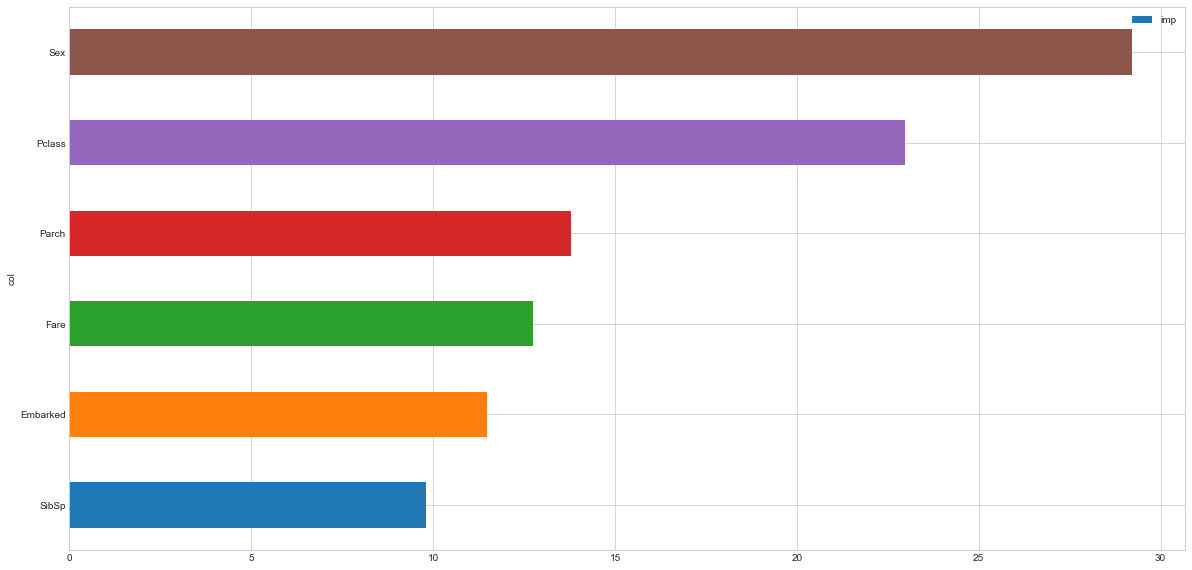

In [165]:
# Plot the feature importance scores
feature_importance(catboost_model, X_train)

## Precision and Recall

In [166]:
metrics = ['Precision', 'Recall', 'F1', 'AUC']

eval_metrics = catboost_model.eval_metrics(train_pool,
                                           metrics=metrics,
                                           plot=True)

for metric in metrics:
    print(str(metric)+": {}".format(np.mean(eval_metrics[metric])))

Precision: 0.8798765427169649
Recall: 0.7200647058823528
F1: 0.7912832504423744
AUC: 0.9059489713918354


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

# Submission

In [167]:
X_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,2,1,1,0,18,2
1,0,0,1,0,207,0
2,2,0,0,0,41,2
3,0,0,1,0,189,2
4,2,1,0,0,43,2


In [168]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [169]:
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

## Predict on test columns

In [171]:
predictions = catboost_model.predict(test[wanted_test_columns].apply(LabelEncoder().fit_transform))

In [172]:
predictions[:20]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1.])

In [175]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [179]:
submission = pd.DataFrame()
submission['PassengerId'] = test["PassengerId"]
submission['Survived'] = predictions.astype(int)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [180]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [182]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('./data/submission.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [183]:
submissions_check = pd.read_csv("./data/submission.csv")
submissions_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
